# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset


In [58]:
df = pd.read_csv('/content/drive/My Drive/Week3_task/Datasets/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [59]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [60]:
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high
6323,11:45:00 PM,9,Thursday,14,3,1,15,33,normal


In [61]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


In [62]:
df.describe(include='object')

,Time,Day of the week,Traffic Situation
count,6324,6324,6324
unique,96,7,4
top,9:30:00 PM,Thursday,normal
freq,77,1020,3858


In [63]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [65]:
corr_d = df.select_dtypes(include='number')
corr = corr_d.corr()

corr

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


<Axes: xlabel='count', ylabel='Traffic Situation'>

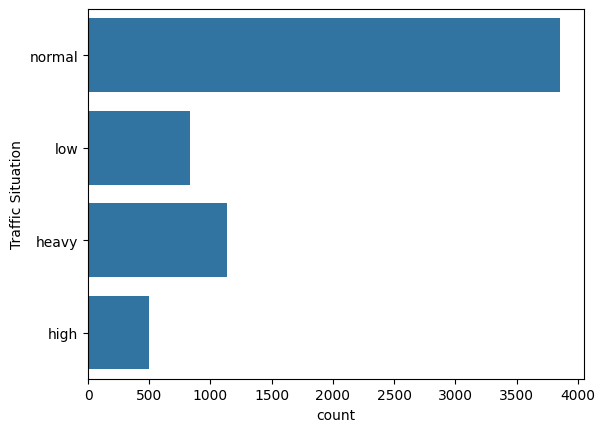

In [66]:
sns.countplot(df['Traffic Situation'])

<Axes: xlabel='count', ylabel='Day of the week'>

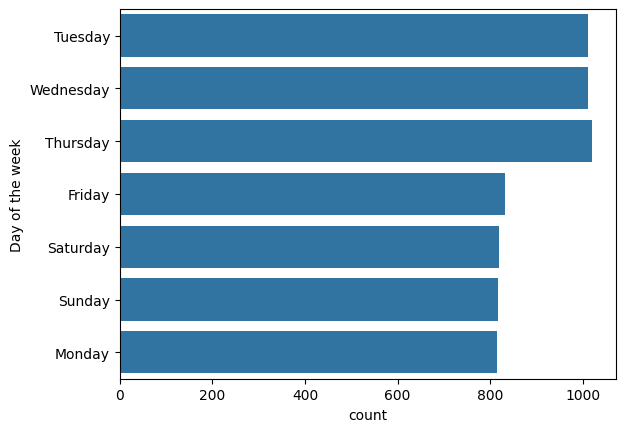

In [67]:
sns.countplot(df['Day of the week'])

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [68]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])

In [70]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,10,5,13,2,2,24,41,3
1,18,10,5,14,1,1,36,52,3
2,20,10,5,10,2,2,32,46,3
3,22,10,5,10,2,2,36,50,3
4,24,10,5,11,2,1,34,48,3


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [72]:
y = df['Traffic Situation']
x = df.drop(['Time', 'Date', 'Traffic Situation'], axis=1)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

<Axes: xlabel='count', ylabel='Traffic Situation'>

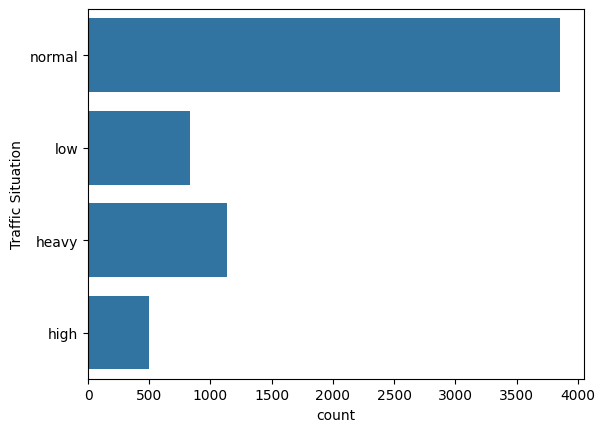

In [ ]:
sns.countplot(df['Traffic Situation'])

<Axes: xlabel='count', ylabel='Day of the week'>

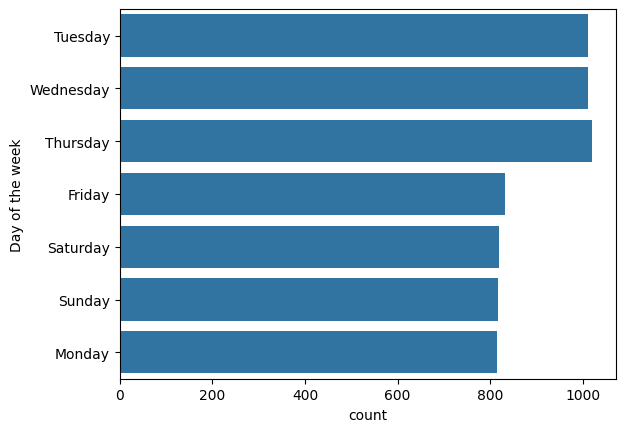

In [ ]:
sns.countplot(df['Day of the week'])

<Axes: >

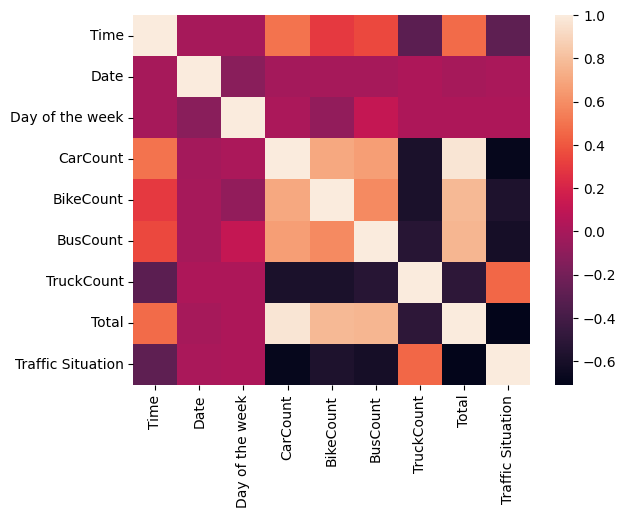

In [74]:
corr_d = df.select_dtypes(include='number')
corr = corr_d.corr()

sns.heatmap(corr)

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [75]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

In [76]:
x= x_scaled
y= y

In [84]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
base_model = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator = base_model, n_estimators=10)

bagging.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

### Evaluate the model performance

In [99]:
y_bagging_train = bagging.predict(x_train)
y_bagging_test = bagging.predict(x_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [100]:
print('Bagging training accuracy_score:\n ', accuracy_score(y_train, y_bagging_train))
print('Bagging training confusion_matrix:\n ', confusion_matrix(y_train, y_bagging_train))
print('Bagging training classification_report:\n ', classification_report(y_train, y_bagging_train))

Bagging training accuracy_score:
  0.956845910528694
Bagging training confusion_matrix:
  [[ 805    0    0    0]
 [   0  291    0   42]
 [   0    0  540   57]
 [   0   24   68 2599]]
Bagging training classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       0.92      0.87      0.90       333
           2       0.89      0.90      0.90       597
           3       0.96      0.97      0.96      2691

    accuracy                           0.96      4426
   macro avg       0.94      0.94      0.94      4426
weighted avg       0.96      0.96      0.96      4426



In [101]:
print('Bagging testing accuracy_score:\n ', accuracy_score(y_test, y_bagging_test))
print('Bagging testing confusion_matrix:\n ', confusion_matrix(y_test, y_bagging_test))
print('Bagging testing classification_report:\n ', classification_report(y_test, y_bagging_test))

Bagging testing accuracy_score:
  0.898840885142255
Bagging testing confusion_matrix:
  [[ 332    0    0    0]
 [   0  125    0   37]
 [   0    0  178   59]
 [   0   28   68 1071]]
Bagging testing classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.82      0.77      0.79       162
           2       0.72      0.75      0.74       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.86      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_model = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(estimator=base_model, n_estimators=10)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)

### Evaluate the model performance

In [102]:
y_ada_train = ada_boost.predict(x_train)
y_ada_test = ada_boost.predict(x_test)

In [104]:
print('ada_boost training accuracy_score:\n ', accuracy_score(y_train, y_ada_train))
print('ada_boost training confusion_matrix:\n ', confusion_matrix(y_train, y_ada_train))
print('ada_boost training classification_report:\n ', classification_report(y_train, y_ada_train))

ada_boost training accuracy_score:
  0.9575237234523272
ada_boost training confusion_matrix:
  [[ 805    0    0    0]
 [   0  273    0   60]
 [   0    0  597    0]
 [   0    4  124 2563]]
ada_boost training classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       0.99      0.82      0.90       333
           2       0.83      1.00      0.91       597
           3       0.98      0.95      0.96      2691

    accuracy                           0.96      4426
   macro avg       0.95      0.94      0.94      4426
weighted avg       0.96      0.96      0.96      4426



In [105]:
print('ada_boost testing accuracy_score:\n ', accuracy_score(y_test, y_ada_test))
print('ada_boost testing confusion_matrix:\n ', confusion_matrix(y_test, y_ada_test))
print('ada_boost testing classification_report:\n ', classification_report(y_test, y_ada_test))

ada_boost testing accuracy_score:
  0.8993677555321391
ada_boost testing confusion_matrix:
  [[ 332    0    0    0]
 [   0  123    0   39]
 [   0    0  183   54]
 [   0   26   72 1069]]
ada_boost testing classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.83      0.76      0.79       162
           2       0.72      0.77      0.74       237
           3       0.92      0.92      0.92      1167

    accuracy                           0.90      1898
   macro avg       0.87      0.86      0.86      1898
weighted avg       0.90      0.90      0.90      1898



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

In [123]:
base_models = [
    ('SVC', SVC()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

### Define meta-learner (LogisticRegression)

In [124]:
meta_model = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [125]:
stacking = StackingClassifier(base_models, final_estimator=meta_model)
stacking.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('SVC', SVC()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('KNeighborsClassifier',
                                KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [126]:
y_stack_train = stacking.predict(x_train)
y_stack_test = stacking.predict(x_test)

In [127]:
print('stacking training accuracy_score:\n ', accuracy_score(y_train, y_stack_train))
print('stacking training confusion_matrix:\n ', confusion_matrix(y_train, y_stack_train))
print('stacking training classification_report:\n ', classification_report(y_train, y_stack_train))

stacking training accuracy_score:
  0.9493899683687302
stacking training confusion_matrix:
  [[ 805    0    0    0]
 [   0  278    0   55]
 [   0    0  532   65]
 [   0   16   88 2587]]
stacking training classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       805
           1       0.95      0.83      0.89       333
           2       0.86      0.89      0.87       597
           3       0.96      0.96      0.96      2691

    accuracy                           0.95      4426
   macro avg       0.94      0.92      0.93      4426
weighted avg       0.95      0.95      0.95      4426



In [128]:
print('stacking testing accuracy_score:\n ', accuracy_score(y_test, y_stack_test))
print('stacking testing confusion_matrix:\n ', confusion_matrix(y_test, y_stack_test))
print('stacking testing classification_report:\n ', classification_report(y_test, y_stack_test))

stacking testing accuracy_score:
  0.9104320337197049
stacking testing confusion_matrix:
  [[ 332    0    0    0]
 [   0  121    0   41]
 [   0    0  190   47]
 [   0   23   59 1085]]
stacking testing classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.84      0.75      0.79       162
           2       0.76      0.80      0.78       237
           3       0.92      0.93      0.93      1167

    accuracy                           0.91      1898
   macro avg       0.88      0.87      0.88      1898
weighted avg       0.91      0.91      0.91      1898



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

i choosed these features  (Day of the week,	CarCount,	BikeCount,	BusCount,	TruckCount,	Total	,TrafficSituation) because these are the important for our model unlike features like time

i used DecisionTreeClassifier for all models for comparesion and they all are similer


i used accuracy_score for overall accuracy,
confusion_matrix for every predicted output with true output,
classification_report for all metrics